In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import random

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px

In [13]:
sd = pd.read_csv('/content/spotify_songs.csv', index_col=0)

In [14]:
sd.head(3)

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616


In [15]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4348 entries, 6f807x0ima9a1j3VPbc7VN to 2Pph0CUJ8uksCBzV6iyuQF
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                4348 non-null   object 
 1   track_artist              4348 non-null   object 
 2   track_popularity          4348 non-null   int64  
 3   track_album_id            4348 non-null   object 
 4   track_album_name          4348 non-null   object 
 5   track_album_release_date  4348 non-null   object 
 6   playlist_name             4348 non-null   object 
 7   playlist_id               4348 non-null   object 
 8   playlist_genre            4348 non-null   object 
 9   playlist_subgenre         4348 non-null   object 
 10  danceability              4348 non-null   float64
 11  energy                    4348 non-null   float64
 12  key                       4348 non-null   int64  
 13  loudness                  434

In [16]:
plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

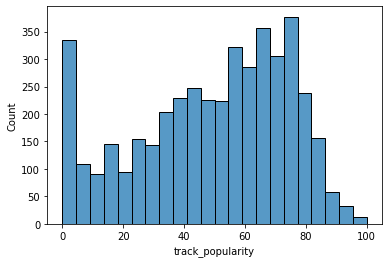

In [17]:
sns.histplot(sd["track_popularity"],bins='auto')

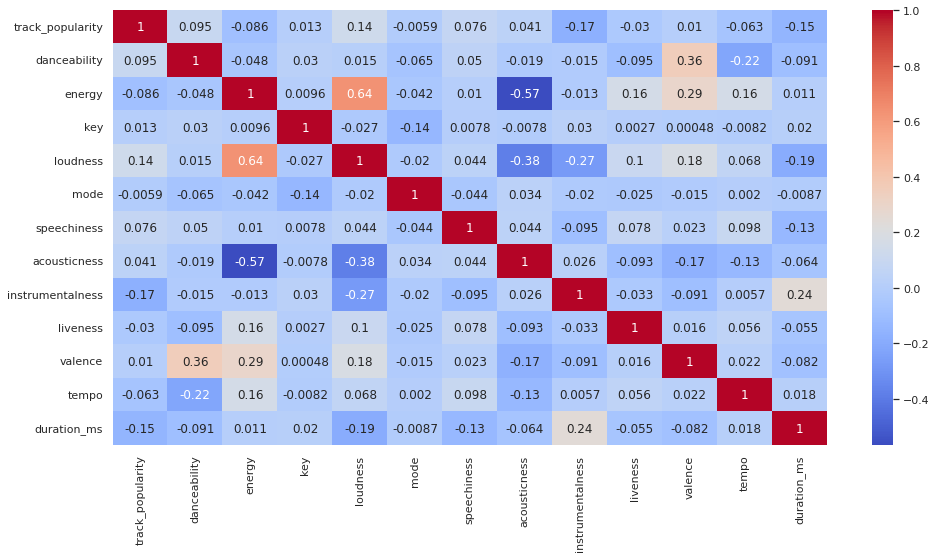

In [18]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
corr = sd.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [19]:
pd.to_datetime(sd['track_album_release_date'])

track_id
6f807x0ima9a1j3VPbc7VN   2019-06-14
0r7CVbZTWZgbTCYdfa2P31   2019-12-13
1z1Hg7Vb0AhHDiEmnDE79l   2019-07-05
75FpbthrwQmzHlBJLuGdC7   2019-07-19
1e8PAfcKUYoKkxPhrHqw4x   2019-03-05
                            ...    
7nnpU2iHbi2k23GNPJMKUM   2020-01-01
4Y36xj2AyVRguhrGB1Linl   2020-01-10
1WGimYNx7U5q68rL0nnEAF   2019-10-18
3a1Zmq0P1E6W80x8EOcVNP   2019-02-15
2Pph0CUJ8uksCBzV6iyuQF   2019-02-08
Name: track_album_release_date, Length: 4348, dtype: datetime64[ns]

In [20]:
sd.head()

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [21]:
pd.to_datetime(sd['track_album_release_date'])

track_id
6f807x0ima9a1j3VPbc7VN   2019-06-14
0r7CVbZTWZgbTCYdfa2P31   2019-12-13
1z1Hg7Vb0AhHDiEmnDE79l   2019-07-05
75FpbthrwQmzHlBJLuGdC7   2019-07-19
1e8PAfcKUYoKkxPhrHqw4x   2019-03-05
                            ...    
7nnpU2iHbi2k23GNPJMKUM   2020-01-01
4Y36xj2AyVRguhrGB1Linl   2020-01-10
1WGimYNx7U5q68rL0nnEAF   2019-10-18
3a1Zmq0P1E6W80x8EOcVNP   2019-02-15
2Pph0CUJ8uksCBzV6iyuQF   2019-02-08
Name: track_album_release_date, Length: 4348, dtype: datetime64[ns]

In [22]:
sd['track_album_release_date'] = pd.to_datetime(sd['track_album_release_date'])

In [23]:
month_of_release = sd['track_album_release_date'].dt.month

In [24]:
day_of_month = sd['track_album_release_date'].dt.day

In [25]:
year_of_release = sd['track_album_release_date'].dt.year

Text(0.5, 1.0, 'Year of release')

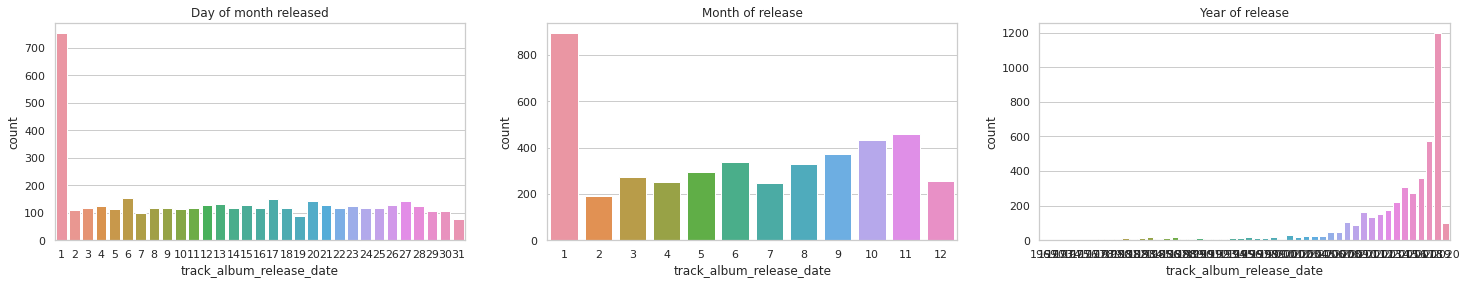

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,4), sharey=False)

sns.countplot(x=day_of_month, ax=axes[0])
sns.countplot(x=month_of_release, ax=axes[1])
sns.countplot(x=year_of_release, ax=axes[2])

axes[0].set_title('Day of month released')
axes[1].set_title('Month of release')
axes[2].set_title('Year of release')

In [27]:
df = pd.DataFrame(sd.drop(columns=['track_album_id','playlist_id']))

In [28]:
df.head(2)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [29]:
del df['track_popularity']

In [30]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [94]:
#one hot encoding
artist_hot = pd.get_dummies(df['playlist_subgenre'])

In [35]:
sd.shape

(4348, 22)

In [36]:
artist_hot.shape

(4348, 4)

In [37]:
features = pd.DataFrame({
    'acousticness' : sd['acousticness'],
    'danceability' : sd['danceability'],
    'energy' : sd['energy'],
    'instumentalness' : sd['instrumentalness'],
    'liveness' : sd['liveness'],
    'loudness' : sd['loudness'],
    'speechiness' : sd['speechiness'],
    'tempo' : sd['tempo'],
    'key' : sd['key'],
    'valence' : sd['valence'],
    'duration_ms' : sd['duration_ms'],
    'mode' : sd['mode'],
    'month_of_release' : month_of_release,
    'day_of_month' : day_of_month,
    'year_of_release': year_of_release
})

In [38]:
final_df = pd.concat([features, artist_hot], axis=1)

In [39]:
final_df.columns = final_df.columns.str.replace(' ', '_')

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4348 entries, 6f807x0ima9a1j3VPbc7VN to 2Pph0CUJ8uksCBzV6iyuQF
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      4348 non-null   float64
 1   danceability      4348 non-null   float64
 2   energy            4348 non-null   float64
 3   instumentalness   4348 non-null   float64
 4   liveness          4348 non-null   float64
 5   loudness          4348 non-null   float64
 6   speechiness       4348 non-null   float64
 7   tempo             4348 non-null   float64
 8   key               4348 non-null   int64  
 9   valence           4348 non-null   float64
 10  duration_ms       4348 non-null   int64  
 11  mode              4348 non-null   int64  
 12  month_of_release  4348 non-null   int64  
 13  day_of_month      4348 non-null   int64  
 14  year_of_release   4348 non-null   int64  
 15  dance_pop         4348 non-null   uint8  
 16  electrop

In [41]:
X_train, X_test, y_train, y_test = train_test_split(final_df, sd['track_popularity'], test_size=0.1, random_state=42)

In [42]:
print("Length of the X_train:", X_train.shape)
print("Length of the y_train:", y_train.shape)
print("Length of the X_test:", X_test.shape)
print("Length of the y_test:", y_test.shape)

Length of the X_train: (3913, 19)
Length of the y_train: (3913,)
Length of the X_test: (435, 19)
Length of the y_test: (435,)


In [43]:
names, mses, rmses, r2s = [], [], [], []

In [44]:
def display_metrics(y_test, y_preds, model_type):
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    result = f'''
    {model_type} MSE  : {mse}
    {model_type} RMSE : {rmse} 
    {model_type} R^2  : {r2}
    '''
    
    names.append(model_type)
    mses.append(mse)
    rmses.append(rmse)
    r2s.append(r2)
    
    print(result)

In [60]:
#Here we are going to apply different regression models
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance

In [47]:
display_metrics(y_test, lr_preds, "Linear Regression")


    Linear Regression MSE  : 532.2229797614008
    Linear Regression RMSE : 23.069958382307515 
    Linear Regression R^2  : 0.10910286461416108
    


In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
elr = ElasticNet(alpha=0.1, random_state=42)
elr.fit(X_train, y_train)
elr_preds = elr.predict(X_test)

In [50]:
display_metrics(y_test, elr_preds, "Elastic Net Regression")


    Elastic Net Regression MSE  : 542.3256269077036
    Elastic Net Regression RMSE : 23.287885840232548 
    Elastic Net Regression R^2  : 0.09219187101803705
    


In [51]:
svr = SVR()
svr.fit(X_train, y_train)
svr_preds = svr.predict(X_test)

In [52]:
display_metrics(y_test, svr_preds, "Support Vector Regressor")


    Support Vector Regressor MSE  : 604.8060419607202
    Support Vector Regressor RMSE : 24.592804678619316 
    Support Vector Regressor R^2  : -0.012395162810162397
    


In [53]:
display_metrics(y_test, svr_preds, "Support Vector Regressor")


    Support Vector Regressor MSE  : 604.8060419607202
    Support Vector Regressor RMSE : 24.592804678619316 
    Support Vector Regressor R^2  : -0.012395162810162397
    


In [54]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr_preds = dtr.predict(X_test)

In [55]:
display_metrics(y_test, dtr_preds, "Decision Tree Regressor")


    Decision Tree Regressor MSE  : 1009.5942528735632
    Decision Tree Regressor RMSE : 31.774112936061066 
    Decision Tree Regressor R^2  : -0.68997706222736
    


In [56]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)

In [57]:
display_metrics(y_test, rfr_preds, "Random Forest Regressor")


    Random Forest Regressor MSE  : 510.5685520287565
    Random Forest Regressor RMSE : 22.595764028435873 
    Random Forest Regressor R^2  : 0.14535058102069642
    


In [89]:
#Here we are going to apply different clustring models
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.cluster import Birch

In [88]:
km= KMeans(random_state=90)
km.fit(X_train, y_train)
km_pred=km.predict(X_test)


In [90]:
display_metrics(y_test, rfr_preds, "K Means Clustring")


    K Means Clustring MSE  : 510.5685520287565
    K Means Clustring RMSE : 22.595764028435873 
    K Means Clustring R^2  : 0.14535058102069642
    


In [91]:
br=Birch()
br.fit(X_train, y_train)
br_pred=br.predict(X_test)


In [92]:
display_metrics(y_test, rfr_preds, "Birch Clustring")


    Birch Clustring MSE  : 510.5685520287565
    Birch Clustring RMSE : 22.595764028435873 
    Birch Clustring R^2  : 0.14535058102069642
    


In [ ]:

#Model Analysis

from plotly.subplots import make_subplots
fig = make_subplots(rows=1,cols=3, subplot_titles=('MSE', "RMSE", "R2"))

fig.add_bar(x=names, y=mses, row=1, col=1)
fig.add_bar(x=names, y=rmses, row=1, col=2)
fig.add_bar(x=names, y=r2s, row=1, col=3)